# ROC-AUC results for various OWA 

In [1]:
import matplotlib.pyplot as plt
import math
from sklearn.metrics import *
from newOWA_aggregation import *

Optimal ROC-AUC threshold: 0.0036

ACCURACY: 0.77
PRECISION: 0.85
RECALL: 0.77
F1-SCORE: 0.81


In [2]:
# dfTrain
dfTrainOWA = pd.read_json('data/train.json', orient='index')
# To fix error: 'TypeError: Object of type 'int64' is not JSON serializable'
dfTrainOWA = dfTrainOWA.astype(object)
xTrain = dfTrainOWA[list(filter(lambda x: x != "truth", dfTrainOWA.columns))]
yTrain = dfTrainOWA["truth"]
xDataTrain = xTrain.as_matrix()
yDataTrain = yTrain.as_matrix()
# dfTest
dfTestOWA = pd.read_json('data/test.json', orient='index')
# To fix error: 'TypeError: Object of type 'int64' is not JSON serializable'
dfTestOWA = dfTestOWA.astype(object)
xTest = dfTestOWA[list(filter(lambda x: x != "truth", dfTestOWA.columns))]
yTest = dfTestOWA["truth"]
xDataTest = xTest.as_matrix()
yDataTest = yTest.as_matrix()

### Weight vector for OWA Max

In [3]:
def weightsOWA_max(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    weights = []
    for i in range(len(features_vector)):
        if i == 0 :
            weights.append(1)
        else:
            weights.append(0)

    return weights

### Weight vector for OWA Arithmetic Mean (am)

In [4]:
def weightsOWA_am(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    weights = np.empty([1, len(features_vector)])
    weights.fill(1/len(features_vector))
    weights = weights.flatten()

    return weights.tolist()

### Weight vector for OWA Weighted Mean (wm)

In [5]:
def weightsOWA_wm(features_vector):
    
    features_vector = (-np.sort(-features_vector))
    
    weights = np.empty([1, len(features_vector)])
    weights.fill(0.5/len(features_vector))
    weights = weights.flatten()

    weights[verified_col] = 1/len(features_vector)

    return weights.tolist()

### Weight vector for OWA Min

In [6]:
def weightsOWA_min(features_vector):
    
    features_vector = (-np.sort(-features_vector))
    
    # Initialize an empty numpy array
    weights = np.zeros([1, len(features_vector)])
    minIndex = np.min(features_vector[np.nonzero(features_vector)])
    for i in range(len(features_vector)):
        if features_vector[i] == minIndex:
            weights[0, i] = 1

    weights = weights.flatten()
    
    return weights.tolist()

### Weight vector for OWA Min (with zero values)

In [7]:
def weightsOWA_min0(features_vector):
    
    features_vector = (-np.sort(-features_vector))
    
    weights = []
    for i in range(len(features_vector)):
        if i != (len(features_vector) - 1) :
            weights.append(0)
        else:
            weights.append(1)

    return weights

### Weight vector for OWA Decreasing values (decr)

In [8]:
def weightsOWA_decr(features_vector):
    
    features_vector = (-np.sort(-features_vector))
    
    weights = []
    # Give a via via a minor weights from 1 to 0
    for i in range(len(features_vector)):
        weights.append((1 - (0.06 * i)) / len(features_vector))

    return weights

### Weight vector for OWA At least 50% (al50)

In [9]:
def weightsOWA_al50(features_vector):
    
    features_vector = (-np.sort(-features_vector))
    
    weights = []
    for i in range(len(features_vector)):
        # vector_len=15, i < 7
        if i < (((len(features_vector) + 1)/2)-1):
            weights.append(1 / 15)
        # vector_len=15, i > 7
        elif i > (((len(features_vector) + 1)/2)-1):
            weights.append(0 / 15)
        # vector_len=15, i = 7
        else:
            weights.append(0.5 / 15)

    return weights

## Linguistic Quantifiers

### Weight vector for OWA More than 25% (more25)

In [10]:
def weightsOWA_more25(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i+1)/len(features_vector)
        if (f > 0 and f <= 0.25):
            q[i] = 0
        elif (f > 0.25 and f <= 1):
            q[i] = (f-0.25)/(1-0.25)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()

### Weight vector for OWA More than 50% (more50)

In [11]:
def weightsOWA_more50(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i+1)/len(features_vector)
        if (f > 0 and f <= 0.5):
            q[i] = 0
        elif (f > 0.5 and f <= 1):
            q[i] = (f-0.5)/(1-0.5)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()

### Weight vector for OWA More than 75% (more75)

In [12]:
def weightsOWA_more75(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i+1)/len(features_vector)
        if (f > 0 and f <= 0.75):
            q[i] = 0
        elif (f > 0.75 and f <= 1):
            q[i] = (f-0.75)/(1-0.75)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i-1]

    
    return weights.tolist()

### Weight vector for OWA Most (most)

In [49]:
def weightsOWA_most(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i + 1) / len(features_vector)
        if (f > 0 and f <= most_lower):
            q[i] = 0
        elif (f > most_lower and f < most_upper):
            q[i] = (f - most_lower) / (most_upper - most_lower)
        elif (f >= most_upper):
            q[i] = 1

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]


    return weights.tolist()

### Weight vector for OWA log10(f) + 1 (log_10)

In [14]:
def weightsOWA_log_10(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i + 1) / len(features_vector)
        q[i] = math.log(f, 10) + 1

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]


    return weights.tolist()

### Weight vector for OWA 1-e^-f (1ef)

In [15]:
def weightsOWA_1ef(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i + 1) / len(features_vector)
        q[i] = 1-math.exp(-f)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]


    return weights.tolist()

### Weight vector for OWA f2 (f2)

In [16]:
def weightsOWA_f2(features_vector):
    
    features_vector = (-np.sort(-features_vector))
    
    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for i in range(len(features_vector)):
        f = (i + 1) / len(features_vector)
        q[i] = f**2

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]

    
    return weights.tolist()

## Linguistic Quantifiers + Importance (v)

In [17]:
# Definition of Importance values v[i]
v = np.empty([1, dfNorm.shape[1]-1])
v = v.flatten()
# v1 = v[0]!!!
v[0] = 0.33; v[1] = 0.12; v[2] = 0.41; v[3] = 0.84; v[4] = 0.43; v[5] = 0.39; v[6] = 0.10
v[7] = 0.35; v[8] = 0.67; v[9] = 0.51; v[10] = 0.49; v[11] = 0.5; v[12] = 0.47; v[13] = 0.56; v[14] = 0.9

### Weight vector for OWA Most + Importance  (mostI)

In [18]:
def weightsOWA_mostI(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = v[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= most_lower):
            q[k] = 0
        elif (summation[k] > most_lower and summation[k] < most_upper):
            q[k] = (summation[k] - most_lower) / (most_upper - most_lower)
        elif (summation[k] >= most_upper):
            q[k] = 1

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()

### Weight vector for OWA More than 75% + Importance  (more75I)

In [19]:
def weightsOWA_more75I(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = v[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################
    print(summation)

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.75):
            q[k] = 0
        elif (summation[k] > 0.75 and summation[k] <= 1):
            q[k] = (summation[k] - 0.75) / (1 - 0.75)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()

### Weight vector for OWA Most and More than 75% + Importance  (most_more75_I)

In [20]:
def weightsOWA_most_more75_I(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = v[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################
    print(summation)

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if summation[k] < 0.5:
            # Most QL
            if (summation[k] > 0 and summation[k] <= most_lower):
                q[k] = 0
            elif (summation[k] > most_lower and summation[k] < most_upper):
                q[k] = (summation[k] - most_lower) / (most_upper - most_lower)
            elif (summation[k] >= most_upper):
                q[k] = 1
        else:
            # More75 QL
            if (summation[k] > 0 and summation[k] <= 0.75):
                q[k] = 0
            elif (summation[k] > 0.75 and summation[k] <= 1):
                q[k] = (summation[k] - 0.75) / (1 - 0.75)


    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


### Weight vector for OWA More than 25% + Importance  (more25I)

In [21]:
def weightsOWA_more25I(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = v[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################
    print(summation)

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.25):
            q[k] = 0
        elif (summation[k] > 0.25 and summation[k] <= 1):
            q[k] = (summation[k] - 0.25) / (1 - 0.25)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


### Weight vector for OWA More than 50% + Importance  (more50I)

In [22]:
def weightsOWA_more50I(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = v[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################
    print(summation)

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.5):
            q[k] = 0
        elif (summation[k] > 0.5 and summation[k] <= 1):
            q[k] = (summation[k] - 0.5) / (1 - 0.5)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


### Weight vector for OWA f2 + Importance  (f2I)

In [23]:
def weightsOWA_f2I(features_vector):
    
    features_vector = (-np.sort(-features_vector))

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = v[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
            q[k] = summation[k]**2


    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]


    return weights.tolist()


## Linguistic Quantifiers + Importance (vScale)

In [3]:
vScale = np.empty([1, dfNorm.shape[1]-1])
vScale = vScale.flatten()
vScale[0] = 4; vScale[1] = 3; vScale[2] = 3; vScale[3] = 3; vScale[4] = 1; vScale[5] = 4; vScale[6] = 1
vScale[7] = 1; vScale[8] = 2; vScale[9] = 2; vScale[10] = 1; vScale[11] = 1; vScale[12] = 1; vScale[13] = 1; vScale[14] = 3

In [4]:
def weightsOWA_mostI_vScale(features_vector):
    
    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vScale[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= most_lower):
            q[k] = 0
        elif (summation[k] > most_lower and summation[k] < most_upper):
            q[k] = (summation[k] - most_lower) / (most_upper - most_lower)
        elif (summation[k] >= most_upper):
            q[k] = 1

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [5]:
def weightsOWA_more75I_vScale(features_vector):
    

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vScale[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.75):
            q[k] = 0
        elif (summation[k] > 0.75 and summation[k] <= 1):
            q[k] = (summation[k] - 0.75) / (1 - 0.75)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [6]:
def weightsOWA_most_more75_I_vScale(features_vector):
    

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vScale[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if summation[k] < 0.5:
            # Most QL
            if (summation[k] > 0 and summation[k] <= most_lower):
                q[k] = 0
            elif (summation[k] > most_lower and summation[k] < most_upper):
                q[k] = (summation[k] - most_lower) / (most_upper - most_lower)
            elif (summation[k] >= most_upper):
                q[k] = 1
        else:
            # More75 QL
            if (summation[k] > 0 and summation[k] <= 0.75):
                q[k] = 0
            elif (summation[k] > 0.75 and summation[k] <= 1):
                q[k] = (summation[k] - 0.75) / (1 - 0.75)


    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [17]:
def weightsOWA_more25I_vScale(features_vector):
    

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vScale[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.25):
            q[k] = 0
        elif (summation[k] > 0.25 and summation[k] <= 1):
            q[k] = (summation[k] - 0.25) / (1 - 0.25)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [20]:
def weightsOWA_more50I_vScale(features_vector):
    

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vScale[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.5):
            q[k] = 0
        elif (summation[k] > 0.25 and summation[k] <= 1):
            q[k] = (summation[k] - 0.5) / (1 - 0.5)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [21]:
def weightsOWA_f2I_vScale(features_vector):
    
    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vScale[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
            q[k] = summation[k]**2


    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]


    return weights.tolist()


## Linguistic Quantifiers + Importance (vTrain)

In [30]:
vTrain = np.empty([1, dfNorm.shape[1]-1])
vTrain = vScale.flatten()
vTrain[0] = 0.9; vTrain[1] = 0.612; vTrain[2] = 0.3; vTrain[3] = 0.836; vTrain[4] = 0.356; vTrain[5] = 0.564; vTrain[6] = 0.724
vTrain[7] = 0.396; vTrain[8] = 0.55; vTrain[9] = 0.54; vTrain[10] = 0.532; vTrain[11] = 0.196; vTrain[12] = 0.554; vTrain[13] = 0.11; vTrain[14] = 0.364

In [31]:
def weightsOWA_mostI_vTrain(features_vector):
    
    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vTrain[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= most_lower):
            q[k] = 0
        elif (summation[k] > most_lower and summation[k] < most_upper):
            q[k] = (summation[k] - most_lower) / (most_upper - most_lower)
        elif (summation[k] >= most_upper):
            q[k] = 1

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [32]:
def weightsOWA_more75I_vTrain(features_vector):
    
    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vTrain[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.75):
            q[k] = 0
        elif (summation[k] > 0.75 and summation[k] <= 1):
            q[k] = (summation[k] - 0.75) / (1 - 0.75)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [33]:
def weightsOWA_most_more75_I_vTrain(features_vector):
    
    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vTrain[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    most_lower = 0.5
    most_upper = 0.6

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if summation[k] < 0.5:
            # Most QL
            if (summation[k] > 0 and summation[k] <= most_lower):
                q[k] = 0
            elif (summation[k] > most_lower and summation[k] < most_upper):
                q[k] = (summation[k] - most_lower) / (most_upper - most_lower)
            elif (summation[k] >= most_upper):
                q[k] = 1
        else:
            # More75 QL
            if (summation[k] > 0 and summation[k] <= 0.75):
                q[k] = 0
            elif (summation[k] > 0.75 and summation[k] <= 1):
                q[k] = (summation[k] - 0.75) / (1 - 0.75)


    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]
        

    return weights.tolist()


In [34]:
def weightsOWA_more50I_vTrain(features_vector):
    

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vTrain[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.5):
            q[k] = 0
        elif (summation[k] > 0.5 and summation[k] <= 1):
            q[k] = (summation[k] - 0.5) / (1 - 0.5)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [35]:
def weightsOWA_more25I_vTrain(features_vector):
    

    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vTrain[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
        if (summation[k] > 0 and summation[k] <= 0.25):
            q[k] = 0
        elif (summation[k] > 0.25 and summation[k] <= 1):
            q[k] = (summation[k] - 0.25) / (1 - 0.25)

    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        elif i == (len(features_vector)-1):
            weights[i] = 1 -  q[i - 1]
        else:
            weights[i] = q[i] - q[i-1]


    return weights.tolist()


In [36]:
def weightsOWA_f2I_vTrain(features_vector):
    
    ########################################################
    a = features_vector
    # b = vector of sorted features in decreasing order
    b = (-np.sort(-a))

    # Importance values u[j] for 'b':
    # v[i] respectively associated with its feature in 'a'
    u = np.empty([1, dfNorm.shape[1] - 1])
    u = u.flatten()
    for i in range(len(a)):
        for j in range(len(b)):
            if a[i] == b[j]:
                u[j] = vTrain[i]

    # Computation of QL x (with the importance no more i/n but SUM(k=1 to j) u[k]/t with t=sum(u)
    t = u.sum()
    summation = np.empty([1, dfNorm.shape[1] - 1])
    summation = summation.flatten()
    for k in range(len(u)):
        if k == 0:
            summation[k] = u[k]/t
        else:
            summation[k] = ((summation[k-1]*t) + u[k]) / t
    ########################################################

    q = np.empty([1, len(features_vector)])
    q = q.flatten()
    for k in range(len(summation)):
            q[k] = summation[k]**2


    weights = np.empty([1, len(features_vector)])
    weights = weights.flatten()
    for i in range(len(features_vector)):
        if i == 0:
            weights[i] = q[i] - 0
        else:
            weights[i] = q[i] - q[i - 1]


    return weights.tolist()


## Computation of the aggregation value 

In [9]:
def calc_aggr_value(features_vector, weight_vector):
    features_vector = -np.sort(features_vector)
    value = 0
    for i in range(len(features_vector)):
        value += features_vector[i] * weight_vector[i]

    return value

### JSON file creation with: *features values, weights, OWA value, truth label*

In [10]:
def eventsOWA(xData, yData, OWA_method, filename):
    eventsOWA = {}
    for eventIndex in range(xData.shape[0]):
        # Sorting the normalized features vectors
        #(-np.sort(-xData[eventIndex])

        OWA_method_str = OWA_method + '(xData[eventIndex])'

        eventsOWA[dfNorm.index[eventIndex]] = {'features': (-np.sort(-xData[eventIndex])).tolist(),
                                                   'weights': eval(OWA_method_str),
                                                   'OWA_value': calc_aggr_value((np.sort(-xData[eventIndex])),
                                                                eval(OWA_method_str)),
                                                   'truth': yData[eventIndex]}

    # New pandas DataFrame from the eventsOrdered to sort it by mean in descending order
    dfOWA = pd.DataFrame(eventsOWA)
    # Fix the orientation
    dfOWA = dfOWA.transpose()
    # Sorting by OWA value in descending order
    #dfOWA = dfOWA.sort_values('OWA_value', ascending=False)
    # Convert the dfOWA to a dict to store it neatly in a json file
    dict_dfOWA = dfOWA.to_dict(orient='index')
    #print(dict_dfOWA)
    with open(filename, 'w') as file:
         output = json.dump(dict_dfOWA, file, indent = 4)

    return dfOWA

## Metrics calculation: Accuracy, Precision, Recall, F1-score, ROC-AUC curve

In [11]:
def metrics_calc(label, prediction):

    fpr, tpr, thresholds = roc_curve(label, prediction)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.savefig("data/rocauc.pdf", format="pdf")
    plt.show()

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('Optimal ROC-AUC threshold:', round(optimal_threshold, 4))

    # Create a binary prediction vector based on OWA optimal threshold
    prediction_label = []
    for i in range(len(prediction)):
        if (prediction[i] >= optimal_threshold):
            prediction_label.append(1)
        else:
            prediction_label.append(0)

    #confusion_matrix = sklearn.metrics.confusion_matrix(label, prediction_label)
    #print('\nTP:', confusion_matrix[1][1], 'TN:', confusion_matrix[0][0],
          #'\nFP:', confusion_matrix[0][1], 'FN:', confusion_matrix[1][0])
            
    accuracy = accuracy_score(label, prediction_label)
    precision = precision_score(label, prediction_label)
    recall = recall_score(label, prediction_label)
    f1 = f1_score(label, prediction_label)

    print('\nACCURACY:', round(accuracy, 2))
    print('PRECISION:', round(precision, 2))
    print('RECALL:', round(recall, 2))
    print('F1-SCORE:', round(f1, 2))

### OWA am result

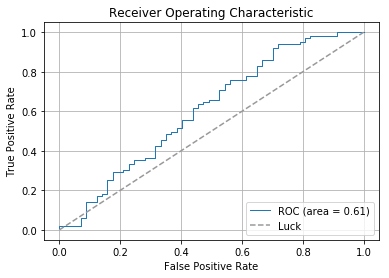

Optimal ROC-AUC threshold: 0.088

ACCURACY: 0.7
PRECISION: 0.69
RECALL: 0.94
F1-SCORE: 0.8


In [40]:
filename = 'data/OWA_am.json'
method = 'weightsOWA_am'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA Max result

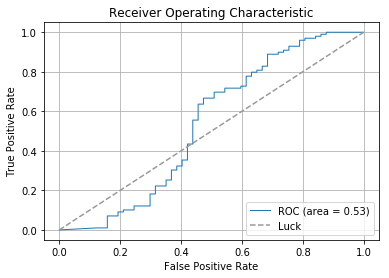

Optimal ROC-AUC threshold: 0.4732

ACCURACY: 0.68
PRECISION: 0.69
RECALL: 0.89
F1-SCORE: 0.78


In [41]:
filename = 'data/OWA_max.json'
method = 'weightsOWA_max'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA Min result

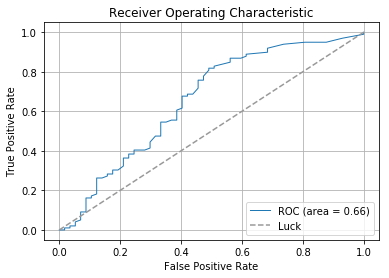

Optimal ROC-AUC threshold: 0.001

ACCURACY: 0.71
PRECISION: 0.74
RECALL: 0.82
F1-SCORE: 0.78


In [42]:
filename = 'data/OWA_min.json'
method = 'weightsOWA_min'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA Min (with zero values) result

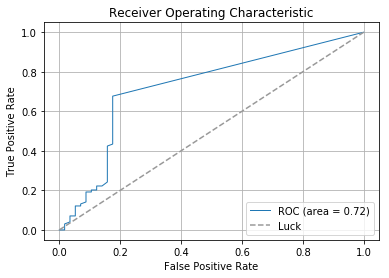

Optimal ROC-AUC threshold: 0.0

ACCURACY: 0.73
PRECISION: 0.87
RECALL: 0.68
F1-SCORE: 0.76


In [43]:
filename = 'data/OWA_min0.json'
method = 'weightsOWA_min0'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA Decr result

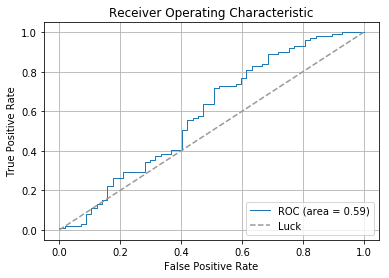

Optimal ROC-AUC threshold: 0.0939

ACCURACY: 0.63
PRECISION: 0.71
RECALL: 0.72
F1-SCORE: 0.71


In [41]:
filename = 'data/OWA_decr.json'
method = 'weightsOWA_decr'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA al50 result

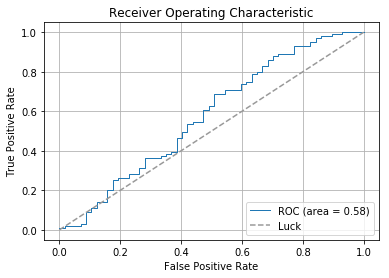

Optimal ROC-AUC threshold: 0.1017

ACCURACY: 0.62
PRECISION: 0.7
RECALL: 0.69
F1-SCORE: 0.69


In [42]:
filename = 'data/OWA_al50.json'
method = 'weightsOWA_al50'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

## Linguistic Quantifiers

### OWA more25 result

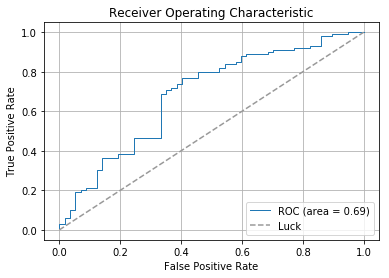

Optimal ROC-AUC threshold: 0.0206

ACCURACY: 0.71
PRECISION: 0.77
RECALL: 0.77
F1-SCORE: 0.77


In [44]:
filename = 'data/OWA_more25.json'
method = 'weightsOWA_more25'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA more50 result

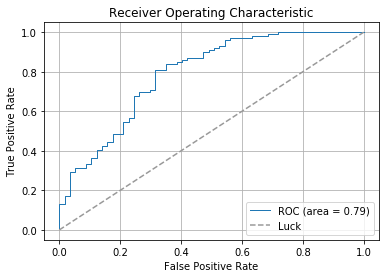

Optimal ROC-AUC threshold: 0.0069

ACCURACY: 0.76
PRECISION: 0.82
RECALL: 0.81
F1-SCORE: 0.81


In [45]:
filename = 'data/OWA_more50.json'
method = 'weightsOWA_more50'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA more75 result

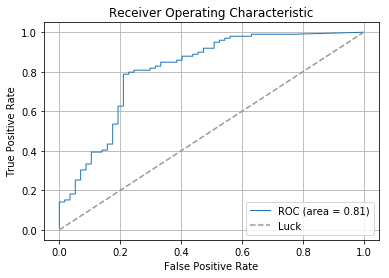

Optimal ROC-AUC threshold: 0.0026

ACCURACY: 0.79
PRECISION: 0.87
RECALL: 0.79
F1-SCORE: 0.83


In [46]:
filename = 'data/OWA_more75.json'
method = 'weightsOWA_more75'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA log_10 result

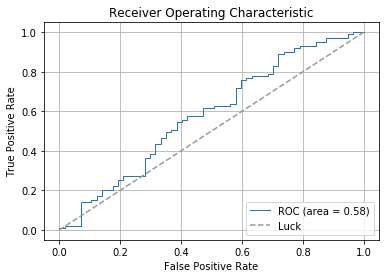

Optimal ROC-AUC threshold: 0.075

ACCURACY: 0.67
PRECISION: 0.68
RECALL: 0.89
F1-SCORE: 0.77


In [46]:
filename = 'data/OWA_log_10.json'
method = 'weightsOWA_log_10'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA 1ef result

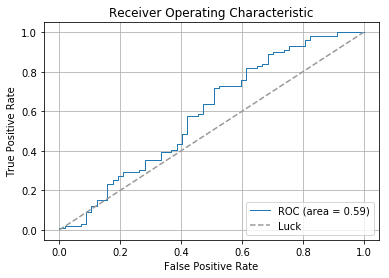

Optimal ROC-AUC threshold: 0.0915

ACCURACY: 0.63
PRECISION: 0.71
RECALL: 0.72
F1-SCORE: 0.71


In [47]:
filename = 'data/OWA_1ef.json'
method = 'weightsOWA_1ef'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA f2 result

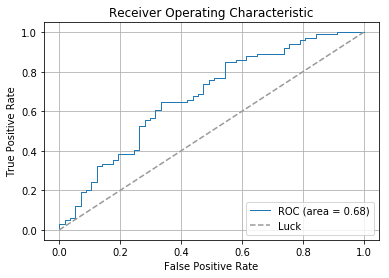

Optimal ROC-AUC threshold: 0.0343

ACCURACY: 0.65
PRECISION: 0.77
RECALL: 0.65
F1-SCORE: 0.7


In [47]:
filename = 'data/OWA_f2.json'
method = 'weightsOWA_f2'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### OWA most result

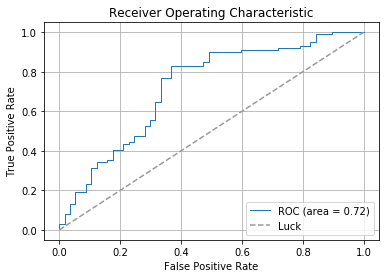

Optimal ROC-AUC threshold: 0.0215

ACCURACY: 0.76
PRECISION: 0.8
RECALL: 0.83
F1-SCORE: 0.81


In [50]:
filename = 'data/OWA_most.json'
method = 'weightsOWA_most'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

## Linguistic Quantifiers + Importance

### mostI (v)

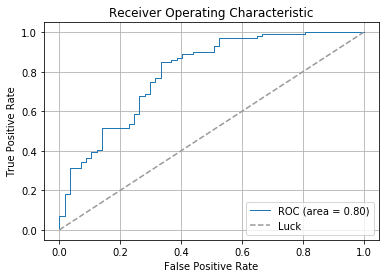

Optimal ROC-AUC threshold: 0.0088

ACCURACY: 0.78
PRECISION: 0.82
RECALL: 0.85
F1-SCORE: 0.83


In [50]:
filename = 'data/OWA_mostI.json'
method = 'weightsOWA_mostI'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### mostI (vScale)

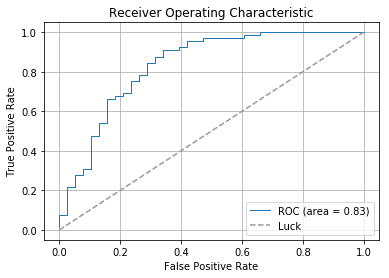

Optimal ROC-AUC threshold: 0.0198

ACCURACY: 0.82
PRECISION: 0.82
RECALL: 0.91
F1-SCORE: 0.86


In [14]:
filename = 'data/OWA_mostI_vScale.json'
method = 'weightsOWA_mostI_vScale'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### mostI (vTrain)

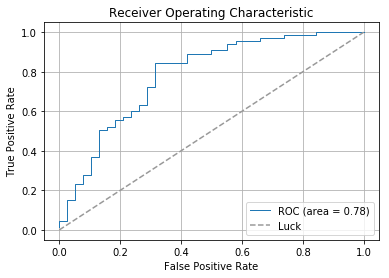

Optimal ROC-AUC threshold: 0.027

ACCURACY: 0.79
PRECISION: 0.82
RECALL: 0.85
F1-SCORE: 0.83


In [51]:
filename = 'data/OWA_mostI_vTrain.json'
method = 'weightsOWA_mostI_vTrain'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more75I (v)

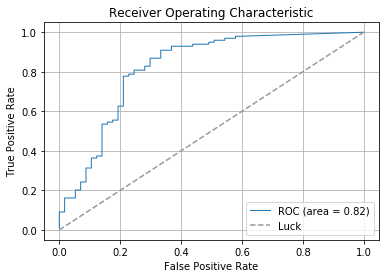

Optimal ROC-AUC threshold: 0.0004

ACCURACY: 0.82
PRECISION: 0.83
RECALL: 0.91
F1-SCORE: 0.87


In [65]:
filename = 'data/OWA_more75I.json'
method = 'weightsOWA_more75I'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more75I (vScale)

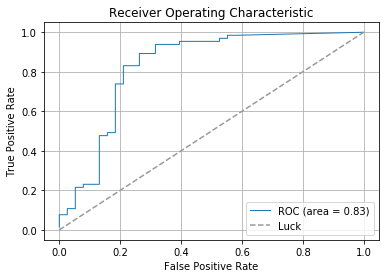

Optimal ROC-AUC threshold: 0.0019

ACCURACY: 0.83
PRECISION: 0.85
RECALL: 0.89
F1-SCORE: 0.87


In [13]:
filename = 'data/OWA_more75I_vScale.json'
method = 'weightsOWA_more75I_vScale'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more75I (vTrain)

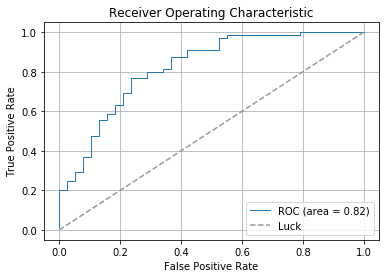

Optimal ROC-AUC threshold: 0.0036

ACCURACY: 0.77
PRECISION: 0.85
RECALL: 0.77
F1-SCORE: 0.81


In [52]:
filename = 'data/OWA_more75I_vTrain.json'
method = 'weightsOWA_more75I_vTrain'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### most_more75_I (v)

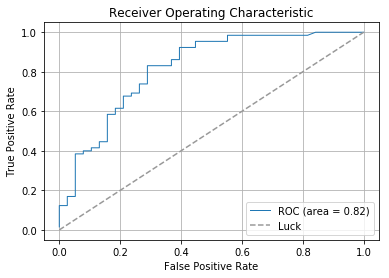

Optimal ROC-AUC threshold: 0.0034

ACCURACY: 0.79
PRECISION: 0.83
RECALL: 0.83
F1-SCORE: 0.83


In [70]:
filename = 'data/OWA_most_more75_I.json'
method = 'weightsOWA_most_more75_I'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### most_more75_I (vScale)

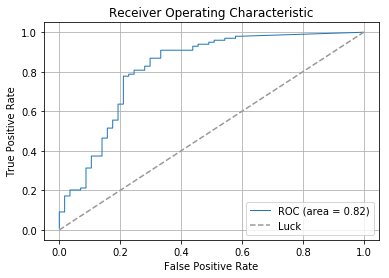

Optimal ROC-AUC threshold: 0.0004

ACCURACY: 0.82
PRECISION: 0.83
RECALL: 0.91
F1-SCORE: 0.87


In [71]:
filename = 'data/OWA_most_more75_I_vScale.json'
method = 'weightsOWA_most_more75_I_vScale'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### most_more75_I (vTrain)

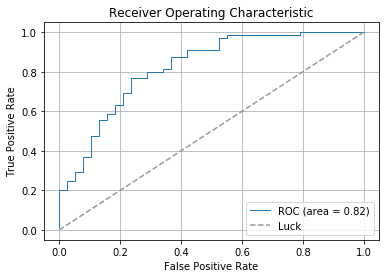

Optimal ROC-AUC threshold: 0.0036

ACCURACY: 0.77
PRECISION: 0.85
RECALL: 0.77
F1-SCORE: 0.81


In [53]:
filename = 'data/OWA_most_more75_I_vTrain.json'
method = 'weightsOWA_most_more75_I_vTrain'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more25I (v)

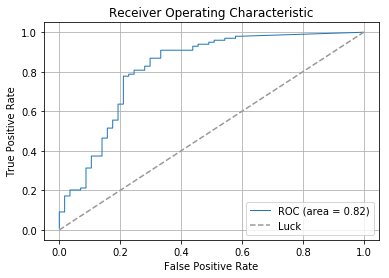

Optimal ROC-AUC threshold: 0.0004

ACCURACY: 0.82
PRECISION: 0.83
RECALL: 0.91
F1-SCORE: 0.87


In [73]:
filename = 'data/OWA_more25I.json'
method = 'weightsOWA_more25I'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

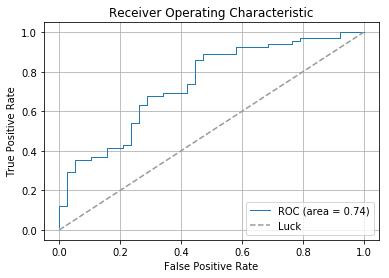

Optimal ROC-AUC threshold: 0.0245

ACCURACY: 0.76
PRECISION: 0.76
RECALL: 0.89
F1-SCORE: 0.82


In [25]:
filename = 'data/OWA_more25I_vScale.json'
method = 'weightsOWA_more25I_vScale'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more50I (v)

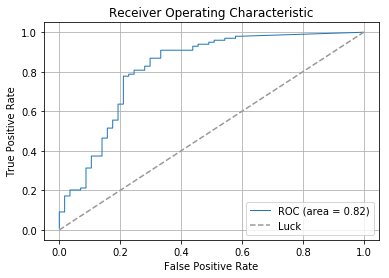

Optimal ROC-AUC threshold: 0.0004

ACCURACY: 0.82
PRECISION: 0.83
RECALL: 0.91
F1-SCORE: 0.87


In [74]:
filename = 'data/OWA_more50I.json'
method = 'weightsOWA_more50I'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more50I (vScale)

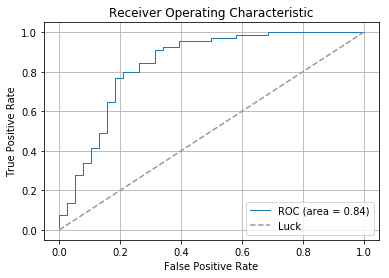

Optimal ROC-AUC threshold: 0.009

ACCURACY: 0.83
PRECISION: 0.83
RECALL: 0.91
F1-SCORE: 0.87


In [24]:
filename = 'data/OWA_more50I_vScale.json'
method = 'weightsOWA_more50I_vScale'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### more50I (vTrain)

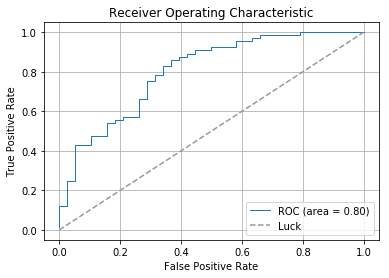

Optimal ROC-AUC threshold: 0.0088

ACCURACY: 0.78
PRECISION: 0.8
RECALL: 0.86
F1-SCORE: 0.83


In [54]:
filename = 'data/OWA_more50I_vTrain.json'
method = 'weightsOWA_more50I_vTrain'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

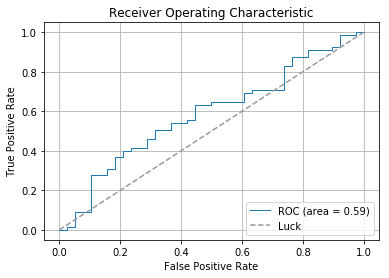

Optimal ROC-AUC threshold: 0.049

ACCURACY: 0.57
PRECISION: 0.73
RECALL: 0.51
F1-SCORE: 0.6


In [55]:
filename = 'data/OWA_more25I_vTrain.json'
method = 'weightsOWA_more25I_vTrain'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

### f2I (v)

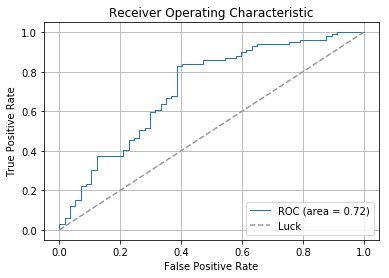

Optimal ROC-AUC threshold: 0.0175

ACCURACY: 0.75
PRECISION: 0.79
RECALL: 0.83
F1-SCORE: 0.81


In [63]:
filename = 'data/OWA_f2I.json'
method = 'weightsOWA_f2I'
x = dfNorm[list(filter(lambda x: x != "truth", dfNorm.columns))]
y = dfNorm["truth"]
xData = x.as_matrix()
yData = y.as_matrix()
dfOWA = eventsOWA(xData, yData, method, filename)
label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

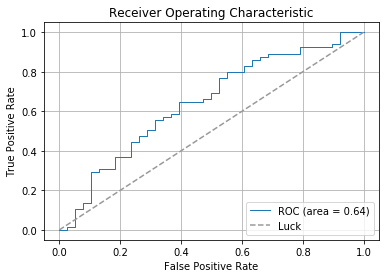

Optimal ROC-AUC threshold: 0.0499

ACCURACY: 0.63
PRECISION: 0.74
RECALL: 0.65
F1-SCORE: 0.69


In [56]:
filename = 'data/OWA_f2I_vTrain.json'
method = 'weightsOWA_f2I_vTrain'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)

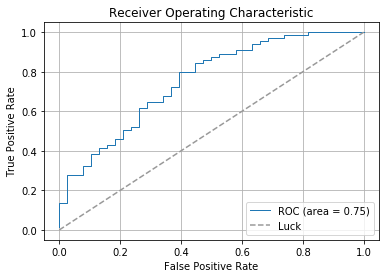

Optimal ROC-AUC threshold: 0.0449

ACCURACY: 0.73
PRECISION: 0.78
RECALL: 0.8
F1-SCORE: 0.79


In [26]:
filename = 'data/OWA_f2I_vScale.json'
method = 'weightsOWA_f2I_vScale'
dfOWA = eventsOWA(xDataTest, yDataTest, method, filename)

label = dfOWA['truth'].values.astype(float)
predictionOWA = dfOWA['OWA_value'].values.astype(float)
metrics_calc(label, predictionOWA)